In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import japanize_matplotlib

import time

In [2]:
def compare_processing_time(n_data, n_cols):
    
    a = np.random.randn(n_data, n_cols) # 正規分布
#    print(a.shape)
#    plt.hist(a.reshape(-1, 1), bins=50)
    
    b = np.random.randint(low=0, high=10, size=(n_data, n_cols))
#    print(b.shape)
#    plt.hist(b.reshape(-1, 1), bins=50)
    
    # DataFame化
    cols = ['col_{}'.format(k) for k in range(0, n_cols)]

    # 処理時間比較用
    elt = []
    
    # (a) 列方向にループ
    df_a = pd.DataFrame(a, columns=cols)
    df_b = pd.DataFrame(b, columns=cols)

    start = time.time()
    for _col in cols:
        df_a[_col] = df_a[_col] + df_b[_col]

    et = time.time() - start
    elt.append(et)
#    print('(a)')
#    print(df_a.head())
    
    # (b) DataFrameどうしで一括計算
    df_a = pd.DataFrame(a, columns=cols)
    df_b = pd.DataFrame(b, columns=cols)

    start = time.time()
    df_c = df_a + df_b

    et = time.time() - start
    elt.append(et)
#    print('(b)')
#    print(df_c.head())
    
    return elt

In [10]:
n_data_list =[10, 100, 1_000, 2_000, 3_000, 5_000, 10_000,]
n_cols = 10_000

elt = []
for n_data in n_data_list:
    print(f'n_data={n_data}')
    _elt = compare_processing_time(n_data, n_cols)
    elt.append(_elt)
    
elt = pd.DataFrame(np.array(elt), columns=['pattern_A', 'pattern_B'])

n_data=10
n_data=100
n_data=1000
n_data=2000
n_data=3000
n_data=5000
n_data=10000


In [14]:
elt['ratio'] = elt['pattern_A'] / elt['pattern_B']
elt['n_data'] = n_data_list

In [15]:
elt

,pattern_A,pattern_B,ratio,n_data
0,4.333321,0.002868,1510.953945,10
1,4.166343,0.007486,556.543457,100
2,4.866975,0.050442,96.487054,1000
3,5.535537,0.100057,55.323762,2000
4,6.145476,0.147550,41.650026,3000
5,7.776608,0.259138,30.009513,5000
6,13.808323,0.512057,26.966401,10000


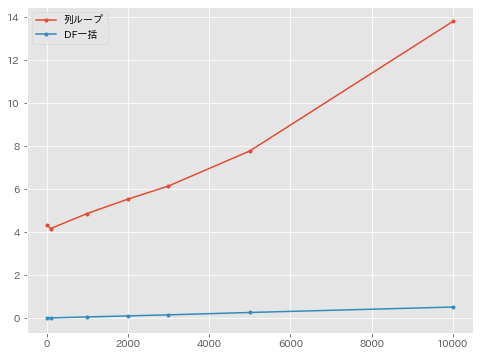

In [13]:
#x = np.arange(len(elt))
x = n_data_list

plt.figure(figsize=(8, 6))
#fig, ax = plt.subplot()
plt.plot(x, elt['pattern_A'].values, marker='.', label='列ループ')
plt.plot(x, elt['pattern_B'].values, marker='.', label='DF一括')
#ax.set_xticklabel(n_data)
plt.legend()
plt.show()